In [3]:
import pandas as pd
import scipy.stats as scp
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

#Full class dataset (both sites) - combining stress and activation data
outdir = "/Users/emilyfurtado/Box/HBN_study/stress_analysis/"
#outdir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/stress_analysis/'
groups = pd.read_csv(outdir+"factor_analysis/NLES_p_subset_3classes.csv", index_col = 0)
groups.index = ["sub-{0}".format(sub) for sub in groups.index]
groups.index.name = "sub"
data = pd.read_csv(outdir+"full_data_20220124.csv", index_col = 0)
data = data.merge(groups, how = "left", left_index = True, right_index = True)

In [4]:
#keeping relevant depression columns and covariates + dropping NaNs
dep_stress = data.loc[data['cond']=='negative',["age",'subjID','meanFD', "site", "female", "MFQ_P_Total", "MDD_mean", "SCARED_P_Total"] + groups.columns.to_list()].drop_duplicates()
dep_stress = dep_stress.dropna()
dep_stress

,age,subjID,meanFD,site,female,MFQ_P_Total,MDD_mean,SCARED_P_Total,ch_illness_a,sib_angry_a,...,p_injury_a,p_money_a,fam_badthings_a,p_famfight_a,p_alc_a,p_forgot_a,p_lostjob_a,fa_upset_a,mo_upset_a,class
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.102532,rubic,1,-0.864325,-0.124354,-1.335183,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.107775,rubic,1,-0.864325,-0.124354,-1.335183,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
sub-NDARAB348EWR,5.805384,sub-NDARAB348EWR,0.372852,cbic,0,0.239258,0.503444,-0.926495,1.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.340212,cbic,0,-0.032912,-0.124354,-1.335183,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.407245,cbic,0,-0.032912,-0.124354,-1.335183,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZW930MF2,10.156399,sub-NDARZW930MF2,0.183040,rubic,0,0.110157,-0.026078,0.966241,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.353221,cbic,1,-1.768690,-0.026078,-1.113379,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.523597,cbic,1,-1.768690,-0.026078,-1.113379,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0


<AxesSubplot:xlabel='class', ylabel='MFQ_P_Total'>

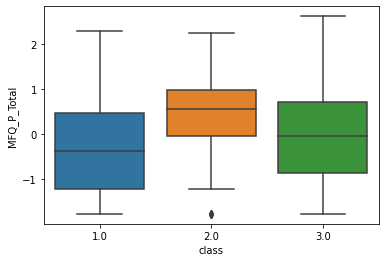

In [3]:
#Class and Parent reported depression distribution
sns.boxplot(x = "class", y = "MFQ_P_Total", data = dep_stress) 

<AxesSubplot:xlabel='class', ylabel='age'>

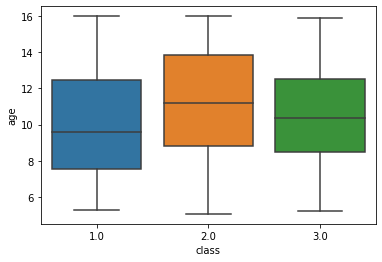

In [4]:
#Checking effects of age 
sns.boxplot(x = "class", y = "age", data = dep_stress) 

In [5]:
#One way ANOVA looking at class categorization and depression
f,p = scp.f_oneway(dep_stress.loc[dep_stress["class"]==1,"MFQ_P_Total"], 
                   dep_stress.loc[dep_stress["class"]==2,"MFQ_P_Total"],
                   dep_stress.loc[dep_stress["class"]==3,"MFQ_P_Total"])
print(round(f,2),round(p,3))

44.79 0.0


In [6]:
#One way ANOVA looking at class categorization and age 
f,p = scp.f_oneway(dep_stress.loc[dep_stress["class"]==1,"age"], 
                   dep_stress.loc[dep_stress["class"]==2,"age"],
                   dep_stress.loc[dep_stress["class"]==3,"age"])
print(round(f,2),round(p,3))

12.68 0.0


In [7]:
#post hoc analysis comparing depression stats between classes
t,p = scp.ttest_ind(dep_stress.loc[dep_stress["class"]==1,"MFQ_P_Total"], 
                   dep_stress.loc[dep_stress["class"]==2,"MFQ_P_Total"])
print("Comparing class 1 and class 2: t={0}, p={1}".format(round(t,2),round(p,3)))

t,p = scp.ttest_ind(dep_stress.loc[dep_stress["class"]==2,"MFQ_P_Total"], 
                   dep_stress.loc[dep_stress["class"]==3,"MFQ_P_Total"])
print("Comparing class 2 and class 3: t={0}, p={1}".format(round(t,2),round(p,3)))

t,p = scp.ttest_ind(dep_stress.loc[dep_stress["class"]==1,"MFQ_P_Total"], 
                   dep_stress.loc[dep_stress["class"]==3,"MFQ_P_Total"])
print("Comparing class 1 and class 3: t={0}, p={1}".format(round(t,2),round(p,3)))

Comparing class 1 and class 2: t=-9.5, p=0.0
Comparing class 2 and class 3: t=6.97, p=0.0
Comparing class 1 and class 3: t=-3.51, p=0.0


In [8]:
#weighted least squares regression model 
dep_stress['class_string'] = ['class{0}'.format(int(a)) for a in dep_stress['class']]
res = smf.wls("MFQ_P_Total ~ age + class_string + female", data = dep_stress).fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:            MFQ_P_Total   R-squared:                       0.079
Model:                            WLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     22.44
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           8.51e-18
Time:                        22:15:02   Log-Likelihood:                -1460.6
No. Observations:                1045   AIC:                             2931.
Df Residuals:                    1040   BIC:                             2956.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

<AxesSubplot:xlabel='class', ylabel='MFQ_P_Total'>

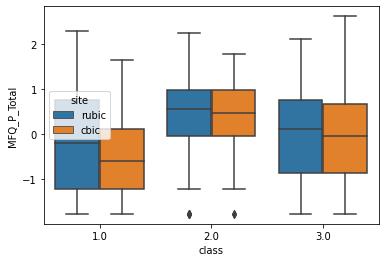

In [9]:
sns.boxplot(x = "class", y = "MFQ_P_Total", hue = "site", data = dep_stress) 

## DISCOVERY SAMPLE (RUBIC): cond = "negative" 

In [6]:
import pandas as pd
import scipy.stats as scp
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


#Full class dataset (both sites) - combining stress and activation data
outdir = "/Users/emilyfurtado/Box/HBN_study/stress_analysis/"
#outdir='/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/stress_analysis/'
groups = pd.read_csv(outdir+"factor_analysis/NLES_p_subset_3classes.csv", index_col = 0)
groups.index = ["sub-{0}".format(sub) for sub in groups.index]
groups.index.name = "sub"
data = pd.read_csv(outdir+"full_data_20220124.csv", index_col = 0)
data = data.merge(groups, how = "left", left_index = True, right_index = True)

In [7]:
#The Present and Despicable Me 
#keeping relevant depression columns and covariates + keeping "rubic" site rows + dropping NaNs
dep_stress = data.loc[data['cond']=='negative',["age", 'subjID','meanFD',"site", "movie", "female", "MFQ_P_Total", "MDD_mean", "SCARED_P_Total", "VentralAttn_mean", "Default_mean"] + groups.columns.to_list()].drop_duplicates()
discovery = dep_stress[(dep_stress['site']=='rubic')]
discovery = discovery.dropna()
#creating string variable so statsmodels uses one class as intercept correctly
discovery['class_string'] = ['class{0}'.format(int(a)) for a in discovery['class']]
discovery

,age,subjID,meanFD,site,movie,female,MFQ_P_Total,MDD_mean,SCARED_P_Total,VentralAttn_mean,...,p_money_a,fam_badthings_a,p_famfight_a,p_alc_a,p_forgot_a,p_lostjob_a,fa_upset_a,mo_upset_a,class,class_string
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.102532,rubic,TP,1,-0.864325,-0.124354,-1.335183,0.102776,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,class3
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.107775,rubic,DM,1,-0.864325,-0.124354,-1.335183,0.084077,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,class3
sub-NDARAG340ERT,10.725872,sub-NDARAG340ERT,0.098886,rubic,TP,0,-0.864325,0.074851,-0.485677,0.139270,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,class3
sub-NDARAG340ERT,10.725872,sub-NDARAG340ERT,0.298653,rubic,DM,0,-0.864325,0.074851,-0.485677,-0.034582,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,class3
sub-NDARAH304ED7,11.286675,sub-NDARAH304ED7,0.188421,rubic,TP,1,-0.193824,0.284382,-1.335183,0.048529,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,class1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZR529EJ1,10.610882,sub-NDARZR529EJ1,0.467868,rubic,DM,0,0.357101,0.284382,-0.251653,0.086234,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARZW363UGM,12.508213,sub-NDARZW363UGM,0.288926,rubic,TP,0,-0.378431,-1.311248,-0.617826,0.013958,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARZW363UGM,12.508213,sub-NDARZW363UGM,0.384725,rubic,DM,0,-0.378431,-1.311248,-0.617826,0.051368,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3


In [8]:
#Age/% female
demo = discovery.loc[:,['age','subjID','female']]
demo = demo.drop_duplicates()
age_mean = demo['age'].mean()
age_sd = demo['age'].std()
female = ((demo['female'].sum())/345)*100
print(round(age_mean,2),round(age_sd,2),round(female,2))

10.34 2.64 36.23


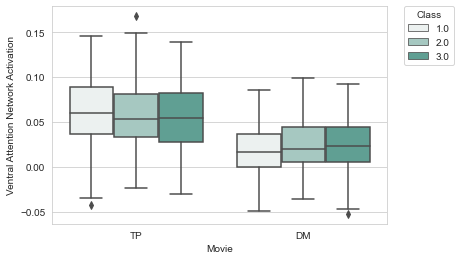

In [9]:
#Class and Ventral Attention distribution
sns.set_style("whitegrid")
sns.boxplot(x = "movie", y = "VentralAttn_mean", hue = "class", palette = "light:#5A9", data = discovery).set(
    xlabel='Movie', 
    ylabel='Ventral Attention Network Activation')
plt.legend(title='Class',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("/Users/emilyfurtado/Box/HBN_study/stress_analysis/figures/discovery_class-VA-movie.png",bbox_inches = 'tight', dpi=300)

In [10]:
#weighted least squares regression model - movie DM
res = smf.wls("VentralAttn_mean ~ age + class_string + female + meanFD", 
              data = discovery.loc[discovery['movie']=='DM',:]).fit()
print(res.summary())

#weighted least squares regression model - movie TP
res = smf.wls("VentralAttn_mean ~ age + class_string + female + meanFD", 
              data = discovery.loc[discovery['movie']=='TP',:]).fit()
print(res.summary())

#mixed effects regression model - both movies
res = smf.mixedlm("VentralAttn_mean ~ age + class_string + female + meanFD", 
              data = discovery, groups='subjID').fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:       VentralAttn_mean   R-squared:                       0.037
Model:                            WLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.025
Date:                Thu, 01 Sep 2022   Prob (F-statistic):             0.0754
Time:                        14:47:01   Log-Likelihood:                 576.69
No. Observations:                 271   AIC:                            -1141.
Df Residuals:                     265   BIC:                            -1120.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


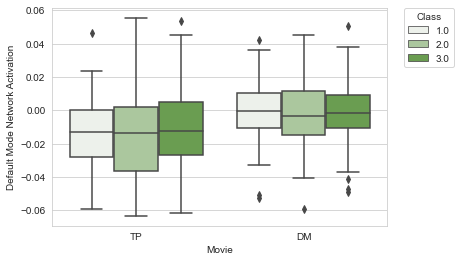

In [11]:
#Class and Default mode distribution
sns.set_style("whitegrid")
sns.boxplot(x = "movie", y = "Default_mean", hue = "class", palette = "light:#6A4", data = discovery).set(
    xlabel='Movie', 
    ylabel='Default Mode Network Activation')
plt.legend(title='Class',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("/Users/emilyfurtado/Box/HBN_study/stress_analysis/figures/discovery_class-DM-movie.png",bbox_inches = 'tight', dpi=300)

In [12]:
#weighted least squares regression model - movie DM
res = smf.wls("Default_mean ~ age + class_string + female + meanFD", 
              data = discovery.loc[discovery['movie']=='DM',:]).fit()
print(res.summary())

#weighted least squares regression model - movie TP
res = smf.wls("Default_mean ~ age + class_string + female + meanFD", 
              data = discovery.loc[discovery['movie']=='TP',:]).fit()
print(res.summary())

#mixed effects regression model - both movies
res = smf.mixedlm("Default_mean ~ age + class_string + female + meanFD", 
              data = discovery, groups='subjID').fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:           Default_mean   R-squared:                       0.032
Model:                            WLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.757
Date:                Thu, 01 Sep 2022   Prob (F-statistic):              0.122
Time:                        14:47:07   Log-Likelihood:                 709.26
No. Observations:                 271   AIC:                            -1407.
Df Residuals:                     265   BIC:                            -1385.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Default_mean
No. Observations:    593       Method:               REML        
No. Groups:          345       Scale:                0.0005      
Min. group size:     1         Log-Likelihood:       1403.1868   
Max. group size:     2         Converged:            Yes         
Mean group size:     1.7                                         
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -0.009    0.004 -2.149 0.032 -0.018 -0.001
class_string[T.class2] -0.001    0.002 -0.487 0.626 -0.006  0.004
class_string[T.class3]  0.002    0.002  0.670 0.503 -0.003  0.006
age                    -0.000    0.000 -0.395 0.693 -0.001  0.001
female                  0.003    0.002  1.641 0.101 -0.001  0.007
meanFD                  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<AxesSubplot:xlabel='class', ylabel='age'>

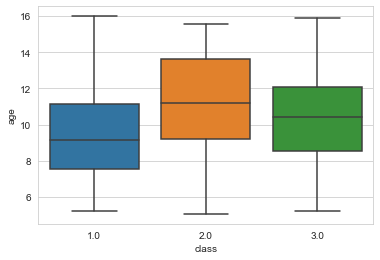

In [13]:
#Checking effects of age 
sns.boxplot(x = "class", y = "age", data = discovery) 

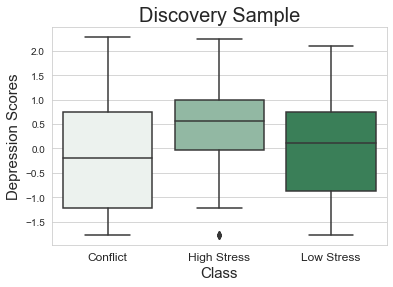

In [14]:
#Class and Depression distribution
plot = sns.boxplot(x = "class", y = "MFQ_P_Total", palette = "light:seagreen", data = discovery)
plot.set_xlabel('Class',fontsize = 15)
plot.set_xticklabels(['Conflict', 'High Stress', 'Low Stress'], fontsize = 12)
plot.set_ylabel('Depression Scores', fontsize = 15)
plot.axes.set_title("Discovery Sample", fontsize = 20)
plt.savefig("/Users/emilyfurtado/Box/HBN_study/stress_analysis/figures/discovery_class-dep.png",bbox_inches = 'tight', dpi=300)

In [15]:
#One way ANOVA looking at class categorization and depression
f,p = scp.f_oneway(discovery.loc[discovery["class"]==1,"MFQ_P_Total"], 
                   discovery.loc[discovery["class"]==2,"MFQ_P_Total"],
                   discovery.loc[discovery["class"]==3,"MFQ_P_Total"])
print(round(f,2),round(p,3))

18.52 0.0


In [16]:
#One way ANOVA looking at class categorization and age 
f,p = scp.f_oneway(discovery.loc[discovery["class"]==1,"age"], 
                   discovery.loc[discovery["class"]==2,"age"],
                   discovery.loc[discovery["class"]==3,"age"])
print(round(f,2),round(p,3))

16.13 0.0


In [19]:
#One way ANOVA looking at class categorization and age (5-10)
f,p = scp.f_oneway(discovery.loc[(discovery["class"]==1) & (discovery["age"]<=10), "MFQ_P_Total"], 
                   discovery.loc[(discovery["class"]==2) & (discovery["age"]<=10), "MFQ_P_Total"],
                   discovery.loc[(discovery["class"]==3) & (discovery["age"]<=10), "MFQ_P_Total"])
print(round(f,2),round(p,3))

3.9 0.021


In [21]:
#post hoc analysis comparing depression stats between classes
t,p = scp.ttest_ind(discovery.loc[discovery["class"]==1,"MFQ_P_Total"], 
                    discovery.loc[discovery["class"]==2,"MFQ_P_Total"])
print("Comparing class 1 and class 2: t={0}, p={1}".format(round(t,2),round(p,3)))

t,p = scp.ttest_ind(discovery.loc[discovery["class"]==2,"MFQ_P_Total"], 
                    discovery.loc[discovery["class"]==3,"MFQ_P_Total"])
print("Comparing class 2 and class 3: t={0}, p={1}".format(round(t,2),round(p,3)))

t,p = scp.ttest_ind(discovery.loc[discovery["class"]==1,"MFQ_P_Total"], 
                    discovery.loc[discovery["class"]==3,"MFQ_P_Total"])
print("Comparing class 1 and class 3: t={0}, p={1}".format(round(t,2),round(p,3)))

Comparing class 1 and class 2: t=-5.7, p=0.0
Comparing class 2 and class 3: t=5.04, p=0.0
Comparing class 1 and class 3: t=-1.57, p=0.118


In [22]:
#creating dummy data for class categories (eg. class = 3 not seen as greater than class = 1)
discovery["class1"] = 0
discovery.loc[discovery["class"]==1, "class1"] = 1
discovery["class2"] = 0
discovery.loc[discovery["class"]==2, "class2"] = 1
discovery["class3"] = 0
discovery.loc[discovery["class"]==3, "class3"] = 1
discovery

,age,subjID,meanFD,site,movie,female,MFQ_P_Total,MDD_mean,SCARED_P_Total,VentralAttn_mean,...,p_alc_a,p_forgot_a,p_lostjob_a,fa_upset_a,mo_upset_a,class,class_string,class1,class2,class3
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.102532,rubic,TP,1,-0.864325,-0.124354,-1.335183,0.102776,...,1.0,1.0,1.0,1.0,2.0,3.0,class3,0,0,1
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.107775,rubic,DM,1,-0.864325,-0.124354,-1.335183,0.084077,...,1.0,1.0,1.0,1.0,2.0,3.0,class3,0,0,1
sub-NDARAG340ERT,10.725872,sub-NDARAG340ERT,0.098886,rubic,TP,0,-0.864325,0.074851,-0.485677,0.139270,...,1.0,2.0,1.0,1.0,2.0,3.0,class3,0,0,1
sub-NDARAG340ERT,10.725872,sub-NDARAG340ERT,0.298653,rubic,DM,0,-0.864325,0.074851,-0.485677,-0.034582,...,1.0,2.0,1.0,1.0,2.0,3.0,class3,0,0,1
sub-NDARAH304ED7,11.286675,sub-NDARAH304ED7,0.188421,rubic,TP,1,-0.193824,0.284382,-1.335183,0.048529,...,1.0,1.0,1.0,1.0,1.0,1.0,class1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZR529EJ1,10.610882,sub-NDARZR529EJ1,0.467868,rubic,DM,0,0.357101,0.284382,-0.251653,0.086234,...,1.0,1.0,1.0,2.0,2.0,3.0,class3,0,0,1
sub-NDARZW363UGM,12.508213,sub-NDARZW363UGM,0.288926,rubic,TP,0,-0.378431,-1.311248,-0.617826,0.013958,...,1.0,1.0,1.0,2.0,2.0,3.0,class3,0,0,1
sub-NDARZW363UGM,12.508213,sub-NDARZW363UGM,0.384725,rubic,DM,0,-0.378431,-1.311248,-0.617826,0.051368,...,1.0,1.0,1.0,2.0,2.0,3.0,class3,0,0,1


In [23]:
#weighted least squares regression model 
res = smf.mixedlm("MFQ_P_Total ~ age + class_string + female", data = discovery, groups='subjID').fit()
print(res.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   MFQ_P_Total
No. Observations:     593       Method:               REML       
No. Groups:           345       Scale:                0.0000     
Min. group size:      1         Log-Likelihood:       1923.8258  
Max. group size:      2         Converged:            Yes        
Mean group size:      1.7                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -0.453    0.179 -2.527 0.011 -0.805 -0.102
class_string[T.class2]  0.690    0.112  6.163 0.000  0.470  0.909
class_string[T.class3]  0.236    0.102  2.300 0.021  0.035  0.437
age                     0.017    0.016  1.061 0.289 -0.014  0.048
female                  0.114    0.086  1.318 0.188 -0.055  0.283
subjID Var              

## REPLICATION SAMPLE (CBIC): cond = "negative"

In [21]:
import pandas as pd
import scipy.stats as scp
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


#Full class dataset (both sites) - combining stress and activation data
outdir = "/Users/emilyfurtado/Box/HBN_study/stress_analysis/"
#outdir='/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/stress_analysis/'
groups = pd.read_csv(outdir+"factor_analysis/NLES_p_subset_3classes.csv", index_col = 0)
groups.index = ["sub-{0}".format(sub) for sub in groups.index]
groups.index.name = "sub"
data = pd.read_csv(outdir+"full_data_20220124.csv", index_col = 0)
data = data.merge(groups, how = "left", left_index = True, right_index = True)

In [22]:
#The Present and Despicable Me
#cond: negative
#keeping relevant depression columns and covariates + keeping "Cbic" site rows + dropping NaNs
dep_stress = data.loc[data['cond']=='negative',["age", 'subjID','meanFD',"site", "movie", "female", "MFQ_P_Total", "MDD_mean", "SCARED_P_Total", "VentralAttn_mean", "Default_mean"] + groups.columns.to_list()].drop_duplicates()
replication = dep_stress[(dep_stress['site']=='cbic')]
replication = replication.dropna()
#creating string variable so statsmodels uses one class as intercept correctly
replication['class_string'] = ['class{0}'.format(int(a)) for a in replication['class']]
replication

,age,subjID,meanFD,site,movie,female,MFQ_P_Total,MDD_mean,SCARED_P_Total,VentralAttn_mean,...,p_money_a,fam_badthings_a,p_famfight_a,p_alc_a,p_forgot_a,p_lostjob_a,fa_upset_a,mo_upset_a,class,class_string
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAB348EWR,5.805384,sub-NDARAB348EWR,0.372852,cbic,TP,0,0.239258,0.503444,-0.926495,0.081755,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.340212,cbic,TP,0,-0.032912,-0.124354,-1.335183,0.085313,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.407245,cbic,DM,0,-0.032912,-0.124354,-1.335183,-0.025748,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARAB514MAJ,5.055213,sub-NDARAB514MAJ,0.522863,cbic,TP,0,1.191076,0.616327,0.219479,0.053051,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,class2
sub-NDARAC331VEH,14.167351,sub-NDARAC331VEH,0.239864,cbic,TP,0,1.191076,2.256853,1.077430,0.085316,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,class2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZW873DN3,13.436344,sub-NDARZW873DN3,0.514050,cbic,DM,1,-0.032912,-0.494864,1.022531,0.047833,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,class1
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.353221,cbic,TP,1,-1.768690,-0.026078,-1.113379,0.079145,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,class3
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.523597,cbic,DM,1,-1.768690,-0.026078,-1.113379,0.025736,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,class3


In [23]:
#Age/%female
demo = replication.loc[:,['age','subjID','female']]
demo = demo.drop_duplicates()
age_mean = demo['age'].mean()
age_sd = demo['age'].std()
female = ((demo['female'].sum())/298)*100
print(round(age_mean,2),round(age_sd,2),round(female,2))

10.68 2.9 39.26


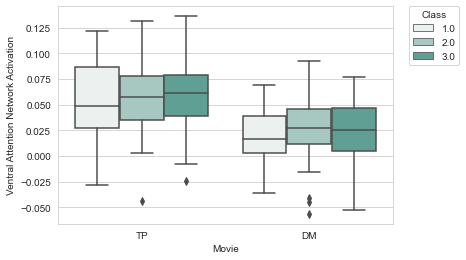

In [24]:
#Class and Ventral Attention distribution
sns.set_style("whitegrid")
sns.boxplot(x = "movie", y = "VentralAttn_mean", hue = "class", palette = "light:#5A9", data = replication).set(
    xlabel='Movie', 
    ylabel='Ventral Attention Network Activation')
plt.legend(title='Class',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("/Users/emilyfurtado/Box/HBN_study/stress_analysis/figures/replication_class-VA-movie.png",bbox_inches = 'tight', dpi=300)

In [25]:
#weighted least squares regression model - movie DM
res = smf.wls("VentralAttn_mean ~ age + class_string + female + meanFD", 
              data = replication.loc[replication['movie']=='DM',:]).fit()
print(res.summary())

#weighted least squares regression model - movie TP
res = smf.wls("VentralAttn_mean ~ age + class_string + female + meanFD", 
              data = replication.loc[replication['movie']=='TP',:]).fit()
print(res.summary())

#mixed effects regression model - both movies
res = smf.mixedlm("VentralAttn_mean ~ age + class_string + female + meanFD", 
              data = replication, groups='subjID').fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:       VentralAttn_mean   R-squared:                       0.012
Model:                            WLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4874
Date:                Thu, 19 May 2022   Prob (F-statistic):              0.785
Time:                        17:34:20   Log-Likelihood:                 450.14
No. Observations:                 209   AIC:                            -888.3
Df Residuals:                     203   BIC:                            -868.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  VentralAttn_mean
No. Observations:  452      Method:              REML            
No. Groups:        298      Scale:               0.0012          
Min. group size:   1        Log-Likelihood:      850.2482        
Max. group size:   2        Converged:           Yes             
Mean group size:   1.5                                           
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.039    0.008  4.786 0.000  0.023  0.055
class_string[T.class2]  0.007    0.005  1.460 0.144 -0.002  0.016
class_string[T.class3]  0.008    0.004  1.990 0.047  0.000  0.017
age                     0.001    0.001  1.301 0.193 -0.000  0.002
female                  0.000    0.003  0.113 0.910 -0.006  0.007
meanFD                 -

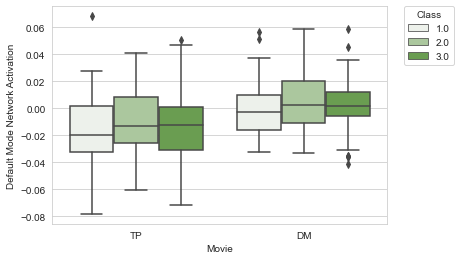

In [26]:
#Class and Default mode distribution
sns.set_style("whitegrid")
sns.boxplot(x = "movie", y = "Default_mean", hue = "class", palette = "light:#6A4", data = replication).set(
    xlabel='Movie', 
    ylabel='Default Mode Network Activation')
plt.legend(title='Class',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("/Users/emilyfurtado/Box/HBN_study/stress_analysis/figures/replication_class-DM-movie.png",bbox_inches = 'tight', dpi=300)

In [27]:
#weighted least squares regression model - movie DM
res = smf.wls("Default_mean ~ age + class_string + female + meanFD", 
              data = replication.loc[replication['movie']=='DM',:]).fit()
print(res.summary())

#weighted least squares regression model - movie TP
res = smf.wls("Default_mean ~ age + class_string + female + meanFD", 
              data = replication.loc[replication['movie']=='TP',:]).fit()
print(res.summary())

#mixed effects regression model - both movies
res = smf.mixedlm("Default_mean ~ age + class_string + female + meanFD", 
              data = replication, groups='subjID').fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:           Default_mean   R-squared:                       0.024
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.002
Date:                Thu, 19 May 2022   Prob (F-statistic):              0.417
Time:                        17:34:23   Log-Likelihood:                 537.89
No. Observations:                 209   AIC:                            -1064.
Df Residuals:                     203   BIC:                            -1044.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Default_mean
No. Observations:    452       Method:               REML        
No. Groups:          298       Scale:                0.0006      
Min. group size:     1         Log-Likelihood:       1024.1722   
Max. group size:     2         Converged:            Yes         
Mean group size:     1.5                                         
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -0.015    0.005 -2.675 0.007 -0.025 -0.004
class_string[T.class2]  0.005    0.003  1.591 0.112 -0.001  0.011
class_string[T.class3]  0.003    0.003  0.959 0.338 -0.003  0.008
age                     0.000    0.000  0.735 0.462 -0.000  0.001
female                 -0.003    0.002 -1.117 0.264 -0.007  0.002
meanFD                  

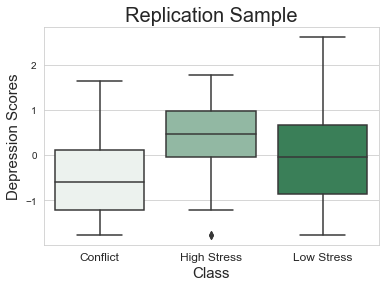

In [28]:
#Class and Depression distribution
plot = sns.boxplot(x = "class", y = "MFQ_P_Total", palette = "light:seagreen", data = replication)
plot.set_xlabel('Class',fontsize = 15)
plot.set_xticklabels(['Conflict', 'High Stress', 'Low Stress'], fontsize = 12)
plot.set_ylabel('Depression Scores', fontsize = 15)
plot.axes.set_title("Replication Sample", fontsize = 20)
plt.savefig("/Users/emilyfurtado/Box/HBN_study/stress_analysis/figures/replication_class-dep.png",bbox_inches = 'tight', dpi=300)

In [74]:
#One way ANOVA looking at class categorization and depression
f,p = scp.f_oneway(replication.loc[replication["class"]==1,"MFQ_P_Total"], 
                   replication.loc[replication["class"]==2,"MFQ_P_Total"],
                   replication.loc[replication["class"]==3,"MFQ_P_Total"])
print(round(f,2),round(p,3))

30.14 0.0


In [75]:
#One way ANOVA looking at class categorization and age 
f,p = scp.f_oneway(replication.loc[replication["class"]==1,"age"], 
                   replication.loc[replication["class"]==2,"age"],
                   replication.loc[replication["class"]==3,"age"])
print(round(f,2),round(p,3))

1.09 0.337


In [76]:
#post hoc analysis comparing depression stats between classes
t,p = scp.ttest_ind(replication.loc[replication["class"]==1,"MFQ_P_Total"], 
                    replication.loc[replication["class"]==2,"MFQ_P_Total"])
print("Comparing class 1 and class 2: t={0}, p={1}".format(round(t,2),round(p,3)))

t,p = scp.ttest_ind(replication.loc[replication["class"]==2,"MFQ_P_Total"], 
                    replication.loc[replication["class"]==3,"MFQ_P_Total"])
print("Comparing class 2 and class 3: t={0}, p={1}".format(round(t,2),round(p,3)))

t,p = scp.ttest_ind(replication.loc[replication["class"]==1,"MFQ_P_Total"], 
                    replication.loc[replication["class"]==3,"MFQ_P_Total"])
print("Comparing class 1 and class 3: t={0}, p={1}".format(round(t,2),round(p,3)))

Comparing class 1 and class 2: t=-8.69, p=0.0
Comparing class 2 and class 3: t=4.73, p=0.0
Comparing class 1 and class 3: t=-3.92, p=0.0


In [77]:
#creating dummy data for class categories (eg. class = 3 not seen as greater than class = 1)
replication["class1"] = 0
replication.loc[replication["class"]==1, "class1"] = 1
replication["class2"] = 0
replication.loc[replication["class"]==2, "class2"] = 1
replication["class3"] = 0
replication.loc[replication["class"]==3, "class3"] = 1
replication

,age,subjID,meanFD,site,movie,female,MFQ_P_Total,MDD_mean,SCARED_P_Total,VentralAttn_mean,...,p_alc_a,p_forgot_a,p_lostjob_a,fa_upset_a,mo_upset_a,class,class_string,class1,class2,class3
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAB348EWR,5.805384,sub-NDARAB348EWR,0.372852,cbic,TP,0,0.239258,0.503444,-0.926495,0.081755,...,1.0,1.0,1.0,2.0,2.0,3.0,class3,0,0,1
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.340212,cbic,TP,0,-0.032912,-0.124354,-1.335183,0.085313,...,1.0,1.0,1.0,2.0,2.0,3.0,class3,0,0,1
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.407245,cbic,DM,0,-0.032912,-0.124354,-1.335183,-0.025748,...,1.0,1.0,1.0,2.0,2.0,3.0,class3,0,0,1
sub-NDARAB514MAJ,5.055213,sub-NDARAB514MAJ,0.522863,cbic,TP,0,1.191076,0.616327,0.219479,0.053051,...,1.0,1.0,2.0,2.0,2.0,2.0,class2,0,1,0
sub-NDARAC331VEH,14.167351,sub-NDARAC331VEH,0.239864,cbic,TP,0,1.191076,2.256853,1.077430,0.085316,...,1.0,2.0,2.0,2.0,2.0,2.0,class2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZW873DN3,13.436344,sub-NDARZW873DN3,0.514050,cbic,DM,1,-0.032912,-0.494864,1.022531,0.047833,...,1.0,1.0,2.0,1.0,1.0,1.0,class1,1,0,0
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.353221,cbic,TP,1,-1.768690,-0.026078,-1.113379,0.079145,...,1.0,2.0,1.0,2.0,2.0,3.0,class3,0,0,1
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.523597,cbic,DM,1,-1.768690,-0.026078,-1.113379,0.025736,...,1.0,2.0,1.0,2.0,2.0,3.0,class3,0,0,1


In [78]:
#weighted least squares regression model 
res = smf.mixedlm("MFQ_P_Total ~ age + class_string + female", data = replication, groups='subjID').fit()
print(res.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   MFQ_P_Total
No. Observations:     452       Method:               REML       
No. Groups:           298       Scale:                0.0000     
Min. group size:      1         Log-Likelihood:       1064.0639  
Max. group size:      2         Converged:            Yes        
Mean group size:      1.5                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -0.582    0.180 -3.227 0.001 -0.935 -0.228
class_string[T.class2]  0.967    0.124  7.825 0.000  0.725  1.209
class_string[T.class3]  0.506    0.110  4.621 0.000  0.292  0.721
age                     0.003    0.015  0.223 0.824 -0.026  0.033
female                 -0.065    0.089 -0.731 0.465 -0.239  0.109
subjID Var              

## Parcel-wise Analysis 

## DISCOVERY

In [120]:
import pandas as pd
import scipy.stats as scp
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


#Full class dataset (both sites) - combining stress and activation data
outdir = "/Users/emilyfurtado/Box/HBN_study/stress_analysis/"
#outdir='/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/stress_analysis/'
groups = pd.read_csv(outdir+"factor_analysis/NLES_p_subset_3classes.csv", index_col = 0)
groups.index = ["sub-{0}".format(sub) for sub in groups.index]
groups.index.name = "sub"
data = pd.read_csv(outdir+"full_data_20220124.csv", index_col = 0)
data = data.merge(groups, how = "left", left_index = True, right_index = True)

In [121]:
#The Present and Despicable Me
#cond: negative
#keeping relevant depression columns and covariates + keeping "Cbic" site rows + dropping NaNs
parcels = []
for a in data.columns:
    if ("_Default" in a) or ("_VentralAttn" in a) or ("_CinguloOperc" in a):
        parcels.append(a)
colsofinterest = ["age", 'subjID','meanFD',"site", "movie", "female", "MFQ_P_Total", "MDD_mean", "SCARED_P_Total", 
                  "VentralAttn_mean", "Default_mean", "CinguloOperc_mean"]
dep_stress = data.loc[data['cond']=='negative',colsofinterest + parcels + groups.columns.to_list()].drop_duplicates()
discovery = dep_stress[(dep_stress['site']=='rubic')]
discovery = discovery.dropna()
#creating string variable so statsmodels uses one class as intercept correctly
discovery['class_string'] = ['class{0}'.format(int(a)) for a in discovery['class']]
discovery
#for a in discovery.columns:
   # print(a)

,age,subjID,meanFD,site,movie,female,MFQ_P_Total,MDD_mean,SCARED_P_Total,VentralAttn_mean,...,p_money_a,fam_badthings_a,p_famfight_a,p_alc_a,p_forgot_a,p_lostjob_a,fa_upset_a,mo_upset_a,class,class_string
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.102532,rubic,TP,1,-0.864325,-0.124354,-1.335183,0.102776,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,class3
sub-NDARAA948VFH,7.982660,sub-NDARAA948VFH,0.107775,rubic,DM,1,-0.864325,-0.124354,-1.335183,0.084077,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,class3
sub-NDARAG340ERT,10.725872,sub-NDARAG340ERT,0.098886,rubic,TP,0,-0.864325,0.074851,-0.485677,0.139270,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,class3
sub-NDARAG340ERT,10.725872,sub-NDARAG340ERT,0.298653,rubic,DM,0,-0.864325,0.074851,-0.485677,-0.034582,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,class3
sub-NDARAH304ED7,11.286675,sub-NDARAH304ED7,0.188421,rubic,TP,1,-0.193824,0.284382,-1.335183,0.048529,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,class1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZR529EJ1,10.610882,sub-NDARZR529EJ1,0.467868,rubic,DM,0,0.357101,0.284382,-0.251653,0.086234,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARZW363UGM,12.508213,sub-NDARZW363UGM,0.288926,rubic,TP,0,-0.378431,-1.311248,-0.617826,0.013958,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARZW363UGM,12.508213,sub-NDARZW363UGM,0.384725,rubic,DM,0,-0.378431,-1.311248,-0.617826,0.051368,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3


In [122]:
results = {key: None for key in parcels}
for p in parcels: 
    res = smf.mixedlm("{0} ~ age + class_string + female + meanFD".format(p), 
              data = discovery, groups='subjID').fit()
    results[p] = res

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/

In [123]:
resultsdf = pd.DataFrame(index = parcels, columns = ["Intercept_tvalue", "Intercept_pvalue","Intercept_CI", 
                                                     "class2_tvalue", "class2_pvalue","class2_CI", 
                                                     "class3_tvalue", "class3_pvalue", "class3_CI"])
for p in parcels:
    CI = results[p].conf_int()
    resultsdf.loc[p,"Intercept_tvalue"] = results[p].tvalues[0]
    resultsdf.loc[p,"Intercept_pvalue"] = results[p].pvalues[0]
    resultsdf.loc[p,"Intercept_CI"] = "({0}, {1})".format(round(CI.iloc[0,0],2), round(CI.iloc[0,1],2))
    resultsdf.loc[p,"class2_tvalue"] = results[p].tvalues[1]
    resultsdf.loc[p,"class2_pvalue"] = results[p].pvalues[1]
    resultsdf.loc[p,"class2_CI"] = "({0}, {1})".format(round(CI.iloc[1,0],2), round(CI.iloc[1,1],2))
    resultsdf.loc[p,"class3_tvalue"] = results[p].tvalues[2]
    resultsdf.loc[p,"class3_pvalue"] = results[p].pvalues[2]
    resultsdf.loc[p,"class3_CI"] = "({0}, {1})".format(round(CI.iloc[2,0],2), round(CI.iloc[2,1],2))
resultsdf

,Intercept_tvalue,Intercept_pvalue,Intercept_CI,class2_tvalue,class2_pvalue,class2_CI,class3_tvalue,class3_pvalue,class3_CI
L_Default_1,-1.419348,0.155798,"(-0.08, 0.01)",-1.356941,0.1748,"(-0.04, 0.01)",-0.370095,0.711311,"(-0.03, 0.02)"
L_Default_2,0.188299,0.850642,"(-0.05, 0.06)",-1.353249,0.175976,"(-0.05, 0.01)",-1.220184,0.222395,"(-0.04, 0.01)"
L_Default_3,-4.119203,0.000038,"(-0.17, -0.06)",-0.681468,0.495575,"(-0.04, 0.02)",1.226452,0.220029,"(-0.01, 0.05)"
L_Default_4,-0.894128,0.371253,"(-0.08, 0.03)",-0.347436,0.728264,"(-0.04, 0.03)",-0.383656,0.701234,"(-0.03, 0.02)"
L_Default_5,1.98927,0.046671,"(0.0, 0.09)",-2.56048,0.010453,"(-0.06, -0.01)",-0.933165,0.350735,"(-0.03, 0.01)"
...,...,...,...,...,...,...,...,...,...
R_VentralAttn_19,-3.698723,0.000217,"(-0.14, -0.04)",0.294824,0.768129,"(-0.02, 0.03)",0.267572,0.789029,"(-0.02, 0.03)"
R_VentralAttn_20,0.146563,0.883477,"(-0.05, 0.05)",-0.892332,0.372215,"(-0.04, 0.02)",-1.425529,0.154004,"(-0.04, 0.01)"
R_VentralAttn_21,4.70149,0.000003,"(0.07, 0.18)",-0.881021,0.378306,"(-0.04, 0.02)",-1.024146,0.305766,"(-0.04, 0.01)"
R_VentralAttn_22,0.75155,0.452322,"(-0.03, 0.07)",1.073113,0.28322,"(-0.01, 0.04)",1.83797,0.066067,"(-0.0, 0.05)"


In [124]:
print(results[p].conf_int())

                               0         1
Intercept              -0.024287  0.078294
class_string[T.class2] -0.037937  0.019442
class_string[T.class3] -0.026566  0.025526
age                     0.000833  0.009063
female                 -0.004663  0.039019
meanFD                 -0.108891  0.017059
subjID Var             -0.078160  0.231461


In [125]:
 print(results[p].summary())

              Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  R_VentralAttn_23
No. Observations:  593      Method:              REML            
No. Groups:        345      Scale:               0.0144          
Min. group size:   1        Log-Likelihood:      374.5325        
Max. group size:   2        Converged:           Yes             
Mean group size:   1.7                                           
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.027    0.026  1.032 0.302 -0.024  0.078
class_string[T.class2] -0.009    0.015 -0.632 0.528 -0.038  0.019
class_string[T.class3] -0.001    0.013 -0.039 0.969 -0.027  0.026
age                     0.005    0.002  2.357 0.018  0.001  0.009
female                  0.017    0.011  1.542 0.123 -0.005  0.039
meanFD                 -

## REPLICATION

In [110]:
import pandas as pd
import scipy.stats as scp
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


#Full class dataset (both sites) - combining stress and activation data
outdir = "/Users/emilyfurtado/Box/HBN_study/stress_analysis/"
#outdir='/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/stress_analysis/'
groups = pd.read_csv(outdir+"factor_analysis/NLES_p_subset_3classes.csv", index_col = 0)
groups.index = ["sub-{0}".format(sub) for sub in groups.index]
groups.index.name = "sub"
data = pd.read_csv(outdir+"full_data_20220124.csv", index_col = 0)
data = data.merge(groups, how = "left", left_index = True, right_index = True)

In [111]:
#The Present and Despicable Me
#cond: negative
#keeping relevant depression columns and covariates + keeping "Cbic" site rows + dropping NaNs
parcels = []
for a in data.columns:
    if ("_Default" in a) or ("_VentralAttn" in a) or ("_CinguloOperc" in a):
        parcels.append(a)
colsofinterest = ["age", 'subjID','meanFD',"site", "movie", "female", "MFQ_P_Total", "MDD_mean", "SCARED_P_Total", 
                  "VentralAttn_mean", "Default_mean", "CinguloOperc_mean"]
dep_stress = data.loc[data['cond']=='negative',colsofinterest + parcels + groups.columns.to_list()].drop_duplicates()
replication = dep_stress[(dep_stress['site']=='cbic')]
replication = replication.dropna()
#creating string variable so statsmodels uses one class as intercept correctly
replication['class_string'] = ['class{0}'.format(int(a)) for a in replication['class']]
replication
#for a in replication.columns:
   # print(a)

,age,subjID,meanFD,site,movie,female,MFQ_P_Total,MDD_mean,SCARED_P_Total,VentralAttn_mean,...,p_money_a,fam_badthings_a,p_famfight_a,p_alc_a,p_forgot_a,p_lostjob_a,fa_upset_a,mo_upset_a,class,class_string
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAB348EWR,5.805384,sub-NDARAB348EWR,0.372852,cbic,TP,0,0.239258,0.503444,-0.926495,0.081755,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.340212,cbic,TP,0,-0.032912,-0.124354,-1.335183,0.085313,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARAB458VK9,12.836185,sub-NDARAB458VK9,0.407245,cbic,DM,0,-0.032912,-0.124354,-1.335183,-0.025748,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,class3
sub-NDARAB514MAJ,5.055213,sub-NDARAB514MAJ,0.522863,cbic,TP,0,1.191076,0.616327,0.219479,0.053051,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,class2
sub-NDARAC331VEH,14.167351,sub-NDARAC331VEH,0.239864,cbic,TP,0,1.191076,2.256853,1.077430,0.085316,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,class2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZW873DN3,13.436344,sub-NDARZW873DN3,0.514050,cbic,DM,1,-0.032912,-0.494864,1.022531,0.047833,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,class1
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.353221,cbic,TP,1,-1.768690,-0.026078,-1.113379,0.079145,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,class3
sub-NDARZX163EWC,9.898471,sub-NDARZX163EWC,0.523597,cbic,DM,1,-1.768690,-0.026078,-1.113379,0.025736,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,class3


In [112]:
results = {key: None for key in parcels}
for p in parcels: 
    res = smf.mixedlm("{0} ~ age + class_string + female + meanFD".format(p), 
              data = replication, groups='subjID').fit()
    results[p] = res

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/

In [113]:
resultsdf = pd.DataFrame(index = parcels, columns = ["Intercept_tvalue", "Intercept_pvalue","Intercept_CI", 
                                                     "class2_tvalue", "class2_pvalue","class2_CI", 
                                                     "class3_tvalue", "class3_pvalue", "class3_CI"])
for p in parcels:
    CI = results[p].conf_int()
    resultsdf.loc[p,"Intercept_tvalue"] = results[p].tvalues[0]
    resultsdf.loc[p,"Intercept_pvalue"] = results[p].pvalues[0]
    resultsdf.loc[p,"Intercept_CI"] = "({0}, {1})".format(round(CI.iloc[0,0],2), round(CI.iloc[0,1],2))
    resultsdf.loc[p,"class2_tvalue"] = results[p].tvalues[1]
    resultsdf.loc[p,"class2_pvalue"] = results[p].pvalues[1]
    resultsdf.loc[p,"class2_CI"] = "({0}, {1})".format(round(CI.iloc[1,0],2), round(CI.iloc[1,1],2))
    resultsdf.loc[p,"class3_tvalue"] = results[p].tvalues[2]
    resultsdf.loc[p,"class3_pvalue"] = results[p].pvalues[2]
    resultsdf.loc[p,"class3_CI"] = "({0}, {1})".format(round(CI.iloc[2,0],2), round(CI.iloc[2,1],2))
resultsdf

,Intercept_tvalue,Intercept_pvalue,Intercept_CI,class2_tvalue,class2_pvalue,class2_CI,class3_tvalue,class3_pvalue,class3_CI
L_Default_1,-1.916497,0.055302,"(-0.11, 0.0)",0.082868,0.933956,"(-0.03, 0.03)",-1.475729,0.140017,"(-0.05, 0.01)"
L_Default_2,0.813974,0.41566,"(-0.03, 0.08)",-0.059691,0.952401,"(-0.03, 0.03)",-0.975396,0.329364,"(-0.05, 0.02)"
L_Default_3,-3.436619,0.000589,"(-0.17, -0.05)",-0.558154,0.576739,"(-0.04, 0.02)",-0.46994,0.638398,"(-0.04, 0.02)"
L_Default_4,-0.496503,0.61954,"(-0.08, 0.05)",-0.225287,0.821756,"(-0.04, 0.03)",-0.085285,0.932035,"(-0.04, 0.03)"
L_Default_5,1.888176,0.059002,"(-0.0, 0.09)",-0.088506,0.929475,"(-0.03, 0.02)",1.213744,0.224845,"(-0.01, 0.04)"
...,...,...,...,...,...,...,...,...,...
R_VentralAttn_19,-0.450983,0.652002,"(-0.07, 0.05)",1.20014,0.230085,"(-0.01, 0.06)",-0.181358,0.856086,"(-0.03, 0.03)"
R_VentralAttn_20,-1.097086,0.272604,"(-0.08, 0.02)",1.050918,0.293296,"(-0.01, 0.05)",1.160355,0.245904,"(-0.01, 0.04)"
R_VentralAttn_21,4.844612,0.000001,"(0.09, 0.21)",1.222809,0.221402,"(-0.01, 0.06)",0.871232,0.383627,"(-0.02, 0.04)"
R_VentralAttn_22,-1.118736,0.263253,"(-0.09, 0.03)",-0.12255,0.902463,"(-0.04, 0.03)",0.313916,0.753585,"(-0.03, 0.04)"


In [114]:
print(results[p].conf_int())

                               0         1
Intercept               0.005608  0.113732
class_string[T.class2] -0.014562  0.048091
class_string[T.class3] -0.019073  0.036887
age                    -0.002545  0.005092
female                 -0.012117  0.033366
meanFD                 -0.112645  0.005976
subjID Var             -0.063105  0.361764


In [115]:
print(results[p].summary())

              Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  R_VentralAttn_23
No. Observations:  452      Method:              REML            
No. Groups:        298      Scale:               0.0114          
Min. group size:   1        Log-Likelihood:      320.5454        
Max. group size:   2        Converged:           Yes             
Mean group size:   1.5                                           
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.060    0.028  2.163 0.031  0.006  0.114
class_string[T.class2]  0.017    0.016  1.049 0.294 -0.015  0.048
class_string[T.class3]  0.009    0.014  0.624 0.533 -0.019  0.037
age                     0.001    0.002  0.654 0.513 -0.003  0.005
female                  0.011    0.012  0.916 0.360 -0.012  0.033
meanFD                 -